In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

RecursionError: maximum recursion depth exceeded while calling a Python object

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fmnist.load_data()

In [3]:
classes = ["T-shirt/top","Trouser","Pullover","Dress",
        "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot",]

In [ ]:
plt.figure(figsize=(2,2))
idx = 1
plt.imshow(train_data[idx], cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.xlabel(classes[train_labels[idx]])

In [5]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), # relu -> rectified linear unit
    tf.keras.layers.Dense(10)
])
model.summary()

In [7]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data, train_labels,
    epochs=20,
    validation_data=(test_data, test_labels)
)

In [ ]:
import pandas as pd
result_df = pd.DataFrame(history.history)
result_df

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
result_df[['loss', 'val_loss']].plot(ax=ax1, style='o-')
result_df[['accuracy', 'val_accuracy']].plot(ax=ax2, style='o-')
plt.suptitle('Training History')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
classes[np.argmax(probability_model.predict(
    np.array([test_data[5]])
))]

In [25]:
def make_prediction(data, model):
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    prediction = probability_model.predict(data)
    predicted_label = [classes[np.argmax(i)] for i in prediction]
    return predicted_label

In [ ]:
make_prediction(test_data[:5], model)

In [ ]:
make_prediction(np.array([test_data[15]]), model)

In [35]:
def view_prediction(data,model):
    labels = make_prediction(data,model)
    plt.figure(figsize=(5,5))
    for i in range(len(data)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[i], cmap='gray_r')
        original_label = classes[test_labels[i]]
        plt.xlabel(f'{labels[i]} ({original_label})', fontdict={'fontsize': 5})
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


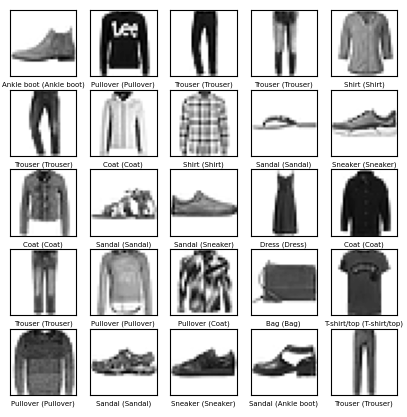

In [36]:
view_prediction(test_data[:25], model)